In this notebook, we will try to predict the actual measurements of control output after the first combiner stage. This is a continous flow process and the data was taken at a rate of 1 Hz.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("continuous_factory_process.csv")

In [3]:
df

,time_stamp,AmbientConditions.AmbientHumidity.U.Actual,AmbientConditions.AmbientTemperature.U.Actual,Machine1.RawMaterial.Property1,Machine1.RawMaterial.Property2,Machine1.RawMaterial.Property3,Machine1.RawMaterial.Property4,Machine1.RawMaterialFeederParameter.U.Actual,Machine1.Zone1Temperature.C.Actual,Machine1.Zone2Temperature.C.Actual,...,Stage2.Output.Measurement10.U.Actual,Stage2.Output.Measurement10.U.Setpoint,Stage2.Output.Measurement11.U.Actual,Stage2.Output.Measurement11.U.Setpoint,Stage2.Output.Measurement12.U.Actual,Stage2.Output.Measurement12.U.Setpoint,Stage2.Output.Measurement13.U.Actual,Stage2.Output.Measurement13.U.Setpoint,Stage2.Output.Measurement14.U.Actual,Stage2.Output.Measurement14.U.Setpoint
0,2019-03-06 10:52:33,17.24,23.53,11.54,200,963.00,247,1241.26,72.0,72.3,...,0.00,7.93,0.00,5.65,0.00,1.85,0.00,2.89,0.00,11.71
1,2019-03-06 10:52:34,17.24,23.53,11.54,200,963.00,247,1246.09,72.0,72.3,...,0.00,7.93,0.00,5.65,0.00,1.85,0.00,2.89,0.00,11.71
2,2019-03-06 10:52:35,17.24,23.53,11.54,200,963.00,247,1246.29,72.0,72.3,...,0.00,7.93,0.00,5.65,0.00,1.85,0.00,2.89,0.00,11.71
3,2019-03-06 10:52:36,17.24,23.53,11.54,200,963.00,247,1247.59,72.0,72.3,...,0.00,7.93,0.00,5.65,0.00,1.85,0.00,2.89,0.00,11.71
4,2019-03-06 10:52:37,17.24,23.53,11.54,200,963.00,247,1252.83,72.1,72.4,...,0.00,7.93,0.00,5.65,0.00,1.85,0.00,2.89,0.00,11.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14083,2019-03-06 14:47:16,13.84,24.43,12.22,201,1048.06,252,1263.76,72.0,71.8,...,7.87,7.93,5.53,5.65,2.07,1.85,3.80,2.89,7.56,11.71
14084,2019-03-06 14:47:17,13.84,24.43,12.22,201,1048.06,252,1255.42,72.0,71.8,...,7.85,7.93,5.48,5.65,2.01,1.85,3.79,2.89,7.76,11.71
14085,2019-03-06 14:47:18,13.84,24.43,12.22,201,1048.06,252,1257.52,72.0,71.8,...,7.93,7.93,5.54,5.65,2.06,1.85,3.83,2.89,7.66,11.71
14086,2019-03-06 14:47:19,13.84,24.43,12.22,201,1048.06,252,1261.99,72.0,71.9,...,7.85,7.93,5.51,5.65,2.05,1.85,3.83,2.89,7.87,11.71


In [136]:
df.describe()

,AmbientConditions.AmbientHumidity.U.Actual,AmbientConditions.AmbientTemperature.U.Actual,Machine1.RawMaterial.Property1,Machine1.RawMaterial.Property2,Machine1.RawMaterial.Property3,Machine1.RawMaterial.Property4,Machine1.RawMaterialFeederParameter.U.Actual,Machine1.Zone1Temperature.C.Actual,Machine1.Zone2Temperature.C.Actual,Machine1.MotorAmperage.U.Actual,...,Stage2.Output.Measurement10.U.Actual,Stage2.Output.Measurement10.U.Setpoint,Stage2.Output.Measurement11.U.Actual,Stage2.Output.Measurement11.U.Setpoint,Stage2.Output.Measurement12.U.Actual,Stage2.Output.Measurement12.U.Setpoint,Stage2.Output.Measurement13.U.Actual,Stage2.Output.Measurement13.U.Setpoint,Stage2.Output.Measurement14.U.Actual,Stage2.Output.Measurement14.U.Setpoint
count,14088.000000,14088.000000,14088.000000,14088.000000,14088.000000,14088.000000,14088.000000,14088.000000,14088.000000,14088.000000,...,1.408800e+04,1.408800e+04,1.408800e+04,1.408800e+04,1.408800e+04,1.408800e+04,1.408800e+04,14088.00,14088.000000,1.408800e+04
mean,15.330759,23.843635,11.851256,205.676320,951.679815,248.868896,1242.764276,72.013330,72.013106,70.333111,...,7.535958e+00,7.930000e+00,5.416515e+00,5.650000e+00,1.972561e+00,1.850000e+00,3.535251e+00,2.89,7.515574,1.171000e+01
std,1.188993,0.373535,0.510309,11.606324,126.662010,3.297820,95.845946,0.063183,0.406313,5.525217,...,1.645785e+00,3.552840e-15,1.182333e+00,8.882099e-16,4.145398e-01,4.441050e-16,4.768244e-01,0.00,2.082948,1.776420e-15
min,13.840000,23.020000,11.540000,200.000000,601.110000,247.000000,231.300000,71.900000,71.300000,44.400000,...,-5.220420e-95,7.930000e+00,-2.703210e-95,5.650000e+00,-6.200020e-96,1.850000e+00,-1.822810e-95,2.89,-3.437021,1.171000e+01
25%,14.040000,23.530000,11.540000,200.000000,963.000000,247.000000,1257.170000,72.000000,71.600000,68.880000,...,7.840000e+00,7.930000e+00,5.560000e+00,5.650000e+00,2.030000e+00,1.850000e+00,3.450000e+00,2.89,7.720000,1.171000e+01
50%,15.120000,23.930000,11.540000,200.000000,963.000000,247.000000,1264.440000,72.000000,72.000000,71.980000,...,7.900000e+00,7.930000e+00,5.630000e+00,5.650000e+00,2.060000e+00,1.850000e+00,3.510000e+00,2.89,7.870000,1.171000e+01
75%,16.630000,24.160000,12.220000,201.000000,1027.430000,251.000000,1273.460000,72.000000,72.400000,72.920000,...,7.950000e+00,7.930000e+00,5.800000e+00,5.650000e+00,2.090000e+00,1.850000e+00,3.760000e+00,2.89,8.080000,1.171000e+01
max,17.240000,24.430000,12.900000,236.000000,1048.060000,257.000000,1331.820000,72.500000,72.700000,88.530000,...,8.590000e+00,7.930000e+00,6.320000e+00,5.650000e+00,5.200000e+00,1.850000e+00,8.000000e+00,2.89,14.260000,1.171000e+01


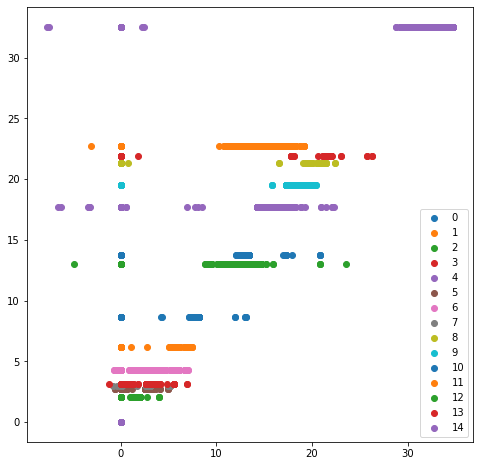

In [5]:
def stage1_plot(df):
    plt.figure(figsize=(8,8))
    for i in range (15):
        plt.scatter(df[("Stage1.Output.Measurement"+str(i)+".U.Actual")],df[("Stage1.Output.Measurement"+str(i)+".U.Setpoint")]
                ,label = i)
    plt.legend(loc="lower right")
    
stage1_plot(df)      

Briefly looking through the described data and the graph, we will realise that the minimum values for some columns are zeros and negetive values. The easiest way is to drop any row that contains a zero. 

In [6]:
df_full = df[(df[df.columns]!=0).all(axis=1)]
df_full

,time_stamp,AmbientConditions.AmbientHumidity.U.Actual,AmbientConditions.AmbientTemperature.U.Actual,Machine1.RawMaterial.Property1,Machine1.RawMaterial.Property2,Machine1.RawMaterial.Property3,Machine1.RawMaterial.Property4,Machine1.RawMaterialFeederParameter.U.Actual,Machine1.Zone1Temperature.C.Actual,Machine1.Zone2Temperature.C.Actual,...,Stage2.Output.Measurement10.U.Actual,Stage2.Output.Measurement10.U.Setpoint,Stage2.Output.Measurement11.U.Actual,Stage2.Output.Measurement11.U.Setpoint,Stage2.Output.Measurement12.U.Actual,Stage2.Output.Measurement12.U.Setpoint,Stage2.Output.Measurement13.U.Actual,Stage2.Output.Measurement13.U.Setpoint,Stage2.Output.Measurement14.U.Actual,Stage2.Output.Measurement14.U.Setpoint
20,2019-03-06 10:52:52,17.24,23.53,11.54,200,963.00,247,1241.780852,72.100109,72.550000,...,2.123500e-105,7.93,1.099600e-105,5.65,2.521900e-106,1.85,7.414500e-106,2.89,2.938300e-122,11.71
34,2019-03-06 10:53:06,17.24,23.53,11.54,200,963.00,247,1245.381787,72.200000,72.625782,...,-2.132770e-95,7.93,-1.104380e-95,5.65,-2.532980e-96,1.85,-7.446970e-96,2.89,-2.951100e-112,11.71
35,2019-03-06 10:53:06,17.24,23.53,11.54,200,963.00,247,1241.587658,72.200000,72.674218,...,-5.220420e-95,7.93,-2.703210e-95,5.65,-6.200020e-96,1.85,-1.822810e-95,2.89,-7.223500e-112,11.71
598,2019-03-06 11:02:28,17.04,23.69,11.54,200,963.00,247,1266.860000,72.100000,72.500000,...,4.840671e+00,7.93,3.448320e+00,5.65,1.250917e+00,1.85,2.833308e+00,2.89,-1.192200e-12,11.71
1539,2019-03-06 11:18:10,16.73,24.00,11.54,200,963.00,247,1256.271475,72.000000,71.678255,...,7.843601e+00,7.93,5.773288e+00,5.65,2.088042e+00,1.85,3.371047e+00,2.89,8.464679e+00,11.71
1679,2019-03-06 11:20:29,16.73,24.09,11.54,200,963.00,247,1273.880316,72.000000,72.550001,...,7.976562e+00,7.93,5.829193e+00,5.65,2.154401e+00,1.85,3.546874e+00,2.89,8.637437e+00,11.71
4460,2019-03-06 12:06:49,16.63,23.77,11.54,200,963.00,247,1166.367312,72.000000,71.399981,...,7.955309e+00,7.93,5.850183e+00,5.65,2.114025e+00,1.85,3.466156e+00,2.89,7.850060e+00,11.71
9669,2019-03-06 13:33:39,14.04,24.19,12.90,215,980.53,251,1263.379220,72.000000,72.100000,...,7.828031e+00,7.93,5.633935e+00,5.65,2.067845e+00,1.85,3.748457e+00,2.89,7.539024e+00,11.71
9917,2019-03-06 13:37:48,14.04,24.19,12.90,215,980.53,251,1255.176216,72.000000,71.500637,...,7.930555e+00,7.93,5.620643e+00,5.65,2.137325e+00,1.85,3.740614e+00,2.89,8.232433e+00,11.71


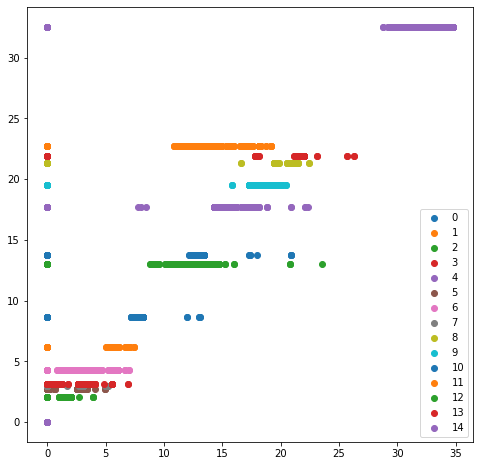

In [7]:
df_positive = df[(df[df.columns[1:]]>=0).all(axis=1)]

stage1_plot(df_positive)

However, because the zero value is not concentrated after dropping the rows we only left with 9 rows, which is not feasible for further analysis. We will have to replace the zero value with the mean or median value.

### Checking how many zeros in each measurement column

In [8]:
(df_positive==0).sum(axis=0)[42:72]

Stage1.Output.Measurement0.U.Actual          70
Stage1.Output.Measurement0.U.Setpoint        56
Stage1.Output.Measurement1.U.Actual        5894
Stage1.Output.Measurement1.U.Setpoint        56
Stage1.Output.Measurement2.U.Actual          85
Stage1.Output.Measurement2.U.Setpoint        56
Stage1.Output.Measurement3.U.Actual         135
Stage1.Output.Measurement3.U.Setpoint        56
Stage1.Output.Measurement4.U.Actual         173
Stage1.Output.Measurement4.U.Setpoint        56
Stage1.Output.Measurement5.U.Actual       13393
Stage1.Output.Measurement5.U.Setpoint        56
Stage1.Output.Measurement6.U.Actual        4701
Stage1.Output.Measurement6.U.Setpoint        56
Stage1.Output.Measurement7.U.Actual        8737
Stage1.Output.Measurement7.U.Setpoint        56
Stage1.Output.Measurement8.U.Actual         776
Stage1.Output.Measurement8.U.Setpoint        56
Stage1.Output.Measurement9.U.Actual         721
Stage1.Output.Measurement9.U.Setpoint        56
Stage1.Output.Measurement10.U.Actual    

As we can see all setpoints have 56 zeros. So we will remove the setpoint zeros for one column to see whether all the zeros for setpoints are in the same row. If yes, then we will drop those rows.

In [9]:
df_0 = df_positive[df_positive["Stage1.Output.Measurement14.U.Setpoint"] != 0]

In [10]:
(df_0==0).sum(axis=0)[42:72]

Stage1.Output.Measurement0.U.Actual          14
Stage1.Output.Measurement0.U.Setpoint         0
Stage1.Output.Measurement1.U.Actual        5838
Stage1.Output.Measurement1.U.Setpoint         0
Stage1.Output.Measurement2.U.Actual          29
Stage1.Output.Measurement2.U.Setpoint         0
Stage1.Output.Measurement3.U.Actual          79
Stage1.Output.Measurement3.U.Setpoint         0
Stage1.Output.Measurement4.U.Actual         117
Stage1.Output.Measurement4.U.Setpoint         0
Stage1.Output.Measurement5.U.Actual       13337
Stage1.Output.Measurement5.U.Setpoint         0
Stage1.Output.Measurement6.U.Actual        4645
Stage1.Output.Measurement6.U.Setpoint         0
Stage1.Output.Measurement7.U.Actual        8681
Stage1.Output.Measurement7.U.Setpoint         0
Stage1.Output.Measurement8.U.Actual         720
Stage1.Output.Measurement8.U.Setpoint         0
Stage1.Output.Measurement9.U.Actual         665
Stage1.Output.Measurement9.U.Setpoint         0
Stage1.Output.Measurement10.U.Actual    

In [11]:
df_mean = df_0.replace(0,df_0.mean())

In [12]:
df_median = df_0.replace(0,df_0.median())

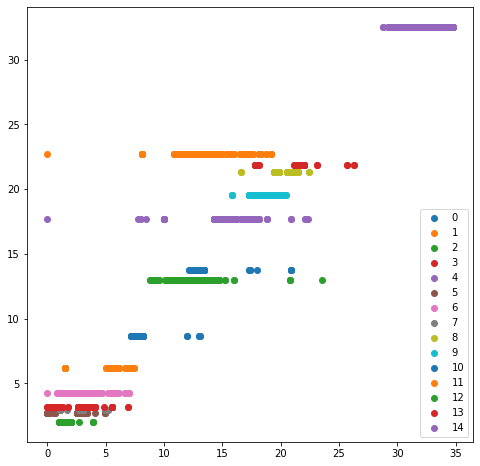

In [13]:
stage1_plot(df_mean)

Check the differences of 15 measurements between actual and setpoint

In [14]:
def measurement_diff(df):
    diffs = []
    for i in range (15):
        diff = np.mean(df[("Stage1.Output.Measurement"+str(i)+".U.Setpoint")]-df[("Stage1.Output.Measurement"+str(i)+".U.Actual")])
        diffs.append(diff)

    print(['%.3f' % diff for diff in diffs])

In [15]:
measurement_diff(df_mean)

['0.789', '11.287', '1.593', '0.347', '-0.746', '2.497', '2.461', '1.178', '0.442', '0.620', '0.820', '3.546', '0.542', '0.207', '4.209']


In [16]:
measurement_diff(df_median)

['0.789', '9.125', '1.593', '0.346', '-0.750', '2.616', '2.362', '1.864', '0.387', '0.577', '0.818', '4.660', '0.477', '0.202', '2.423']


### Predict Stage1 using data until column 71

In [17]:
def data (df):
    actual_column = [42,44,46,48,50,52,54,56,58,60,62,64,66,68,70]
    actual_name = list(df.columns[actual_column])
    setpoint_column = [x+1 for x in actual_column]
    setpoint_name = list(df.columns[setpoint_column])

    dataset = df.iloc[:,:72]
    actual_data = dataset.iloc[:,actual_column]
    setpoint_data = dataset.iloc[:,setpoint_column]
    dataset = dataset.drop(columns=actual_name)
    dataset = dataset.drop(columns=setpoint_name)

    dataset = dataset.iloc[:,1:]
    return dataset, actual_data

dataset, mean_actual_data = data(df_mean)
_ , median_actual_data = data(df_median)

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

In [94]:
x_train, x_test, y_train, y_test = train_test_split(dataset,mean_actual_data,random_state=42)
x_trainm, x_testm, y_trainm, y_testm = train_test_split(dataset,median_actual_data,random_state=42)

In [137]:
def model(modeltype,name,x_train, x_test, y_train, y_test):
    model = modeltype
    model.fit(x_train,y_train)
    y_predict = model.predict(x_test)
    score = r2_score(y_test, y_predict)
    error = mean_absolute_error(y_test, y_predict)
    avg_error = abs((y_test - y_predict)).mean()
    print(str(name)+" :R2 score is %.3f and mean absolute error is %.3f" %(score,error))
    return avg_error, y_predict 

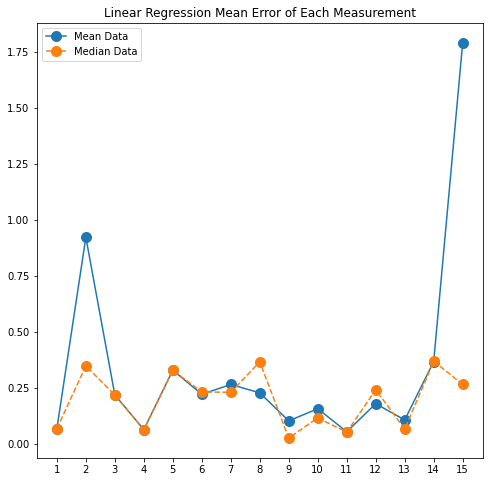

In [118]:
def plot (mean_data,median_data,name):
    plt.figure(figsize=(8,8))
    plt.plot(range(1,16),mean_data,'-o',markersize=10)
    plt.plot(range(1,16),median_data,'--o',markersize=10)
    plt.xticks(np.arange(1,16,1))
    plt.title(str(name)+" of Each Measurement")
    plt.legend(["Mean Data","Median Data"])

In [119]:
def R2score(modeltype,data):
    scores = []
    for i in range (15):
        actual = data["Stage1.Output.Measurement"+str(i)+".U.Actual"]
        x_train, x_test, y_train, y_test = train_test_split(dataset,actual,random_state=42)
        model = modeltype
        model.fit(x_train,y_train)
        y_predict = model.predict(x_test)
        score = r2_score(y_test, y_predict)
        scores.append(score)
        #print ("Measurement "+str(i)+": %.3f" %score)
    return scores

Lin_mean_r2 = R2score(LinearRegression(),mean_actual_data)
Lin_median_r2 = R2score(LinearRegression(),median_actual_data)

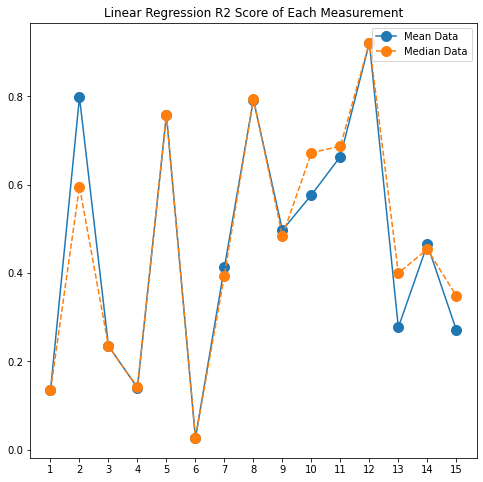

In [120]:
plot(Lin_mean_r2,Lin_median_r2, "Linear Regression R2 Score")

In [139]:
Lin_mean_error, _ = model(LinearRegression(),"Linear Regression-Mean",x_train, x_test, y_train, y_test)
Lin_median_error, _ = model(LinearRegression(),"Linear Regression-Median",x_trainm, x_testm, y_trainm, y_testm)

RF_mean_error, _ = model(RandomForestRegressor(random_state=42),"Random Forest-Mean",x_train, x_test, y_train, y_test)
RF_median_error, _ = model(RandomForestRegressor(random_state=42),"Random Forest-Median",x_trainm, x_testm, y_trainm, y_testm)

Linear Regression-Mean :R2 score is 0.465 and mean absolute error is 0.339
Linear Regression-Median :R2 score is 0.470 and mean absolute error is 0.200
Random Forest-Mean :R2 score is 0.711 and mean absolute error is 0.162
Random Forest-Median :R2 score is 0.658 and mean absolute error is 0.087


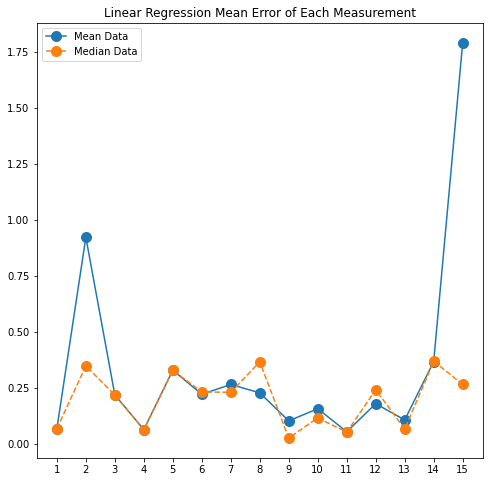

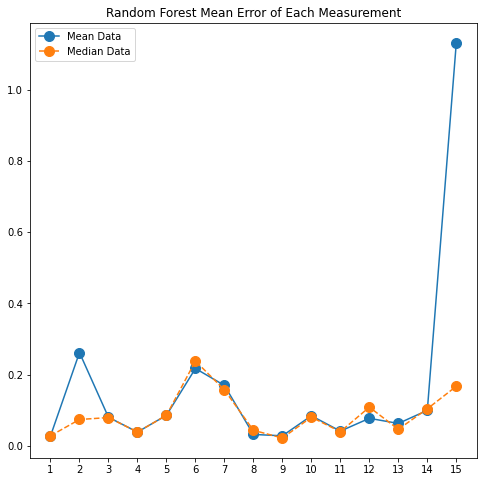

In [140]:
plot(Lin_mean_error,Lin_median_error,"Linear Regression Mean Error")
plot(RF_mean_error,RF_median_error,"Random Forest Mean Error")

In [116]:
RF_mean_r2 = R2score(RandomForestRegressor(random_state=42),mean_actual_data)
RF_median_r2 = R2score(RandomForestRegressor(random_state=42),median_actual_data)

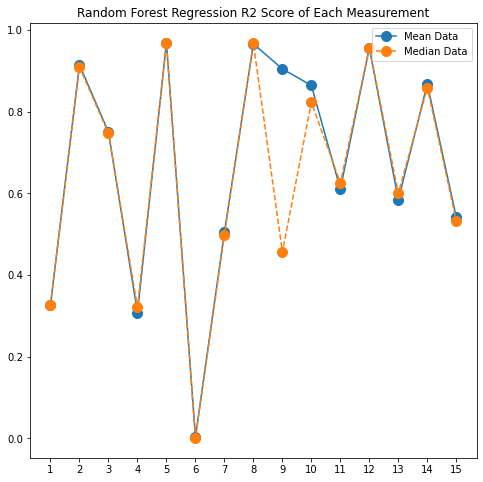

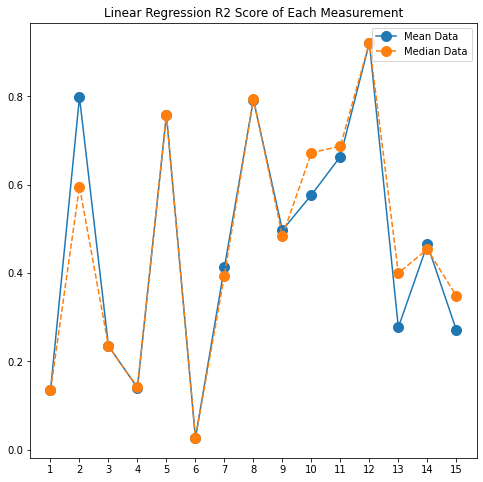

In [127]:
plot(RF_mean_r2,RF_median_r2, "Random Forest Regression R2 Score")
plot(Lin_mean_r2,Lin_median_r2, "Linear Regression R2 Score")

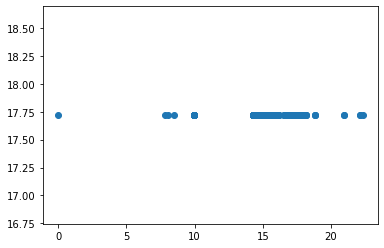

In [131]:
plt.scatter(df_mean[("Stage1.Output.Measurement14.U.Actual")],df_mean[("Stage1.Output.Measurement14.U.Setpoint")])

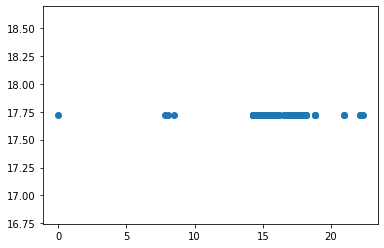

In [132]:
plt.scatter(df_median[("Stage1.Output.Measurement14.U.Actual")],df_median[("Stage1.Output.Measurement14.U.Setpoint")])

In [ ]:
importance = regressor.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

In [ ]:
data36 =dataset1_amb.columns[36]
data36

In [ ]:
importance_feature = pd.DataFrame(importance,columns=["Feature Importance"])
importance_feature.sort_values(by=["Feature Importance"],ascending=False,inplace=True)
importance_feature.head(10)

In [ ]:
importance_feature_col = importance_feature.index
importance_feature_col[:10]

In [ ]:
importance_feature_data = dataset1_amb.iloc[:,importance_feature_col]
x_trainim, x_testim, y_trainim, y_testim = train_test_split(importance_feature_data,actual11,random_state=0)
model = LinearRegression()
model.fit(x_trainim,y_trainim)
y_predictim = model.predict(x_testim)

In [ ]:
r2_score(y_testim, y_predictim)

In [ ]:
mean_absolute_error(y_testim, y_predictim)